In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
pd.set_option('display.max_columns', None)

In [4]:
teis = pd.read_csv('data/teis.csv')

C:\Users\nelso\AppData\Local\Temp\ipykernel_11096\3735573507.py:1: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  teis = pd.read_csv('data/teis.csv')


In [5]:
teis_domains = teis[['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank',  'Motor Percentile Rank', 'Cognitive Percentile Rank']]  
teis_subdomains = teis[['Adaptive-Self Care PR', 'Adaptive-Personal Responsibility PR', 'Social Emotional-Adult Interaction PR', 'Social Emotional-Peer Interaction PR', 'Social Emotional-Self Concept / Social Role PR', 'Communication-Receptive Communication PR', 'Communication-Expressive Communication PR', 'Motor-Gross Motor PR', 'Motor-Fine Motor PR', 'Motor-Perceptual Motor PR', 'Cognitive-Attention and Memory PR', 'Cognitive-Reasoning / Academic Skills PR', 'Cognitive-Perception and Concepts PR']]

C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

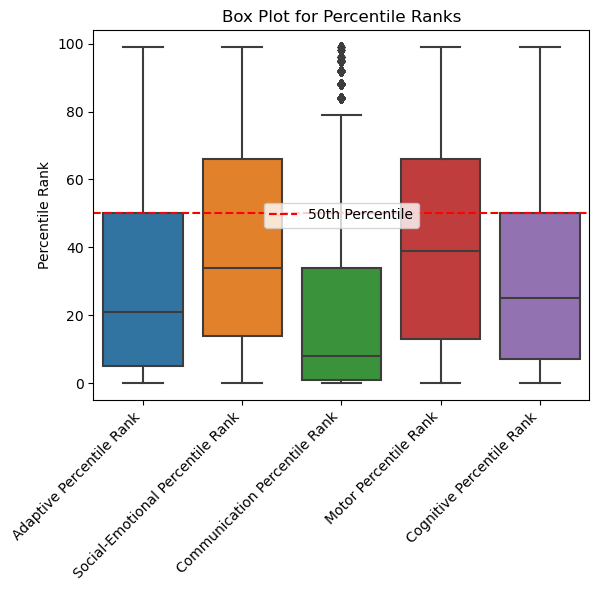

In [6]:
sns.boxplot(data=teis_domains)

# horizontal line at the 50th percentile mark
plt.axhline(y=50, color='r', linestyle='--', label='50th Percentile')
plt.title('Box Plot for Percentile Ranks')
plt.ylabel('Percentile Rank')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels at a 45-degree angle
plt.legend()


C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

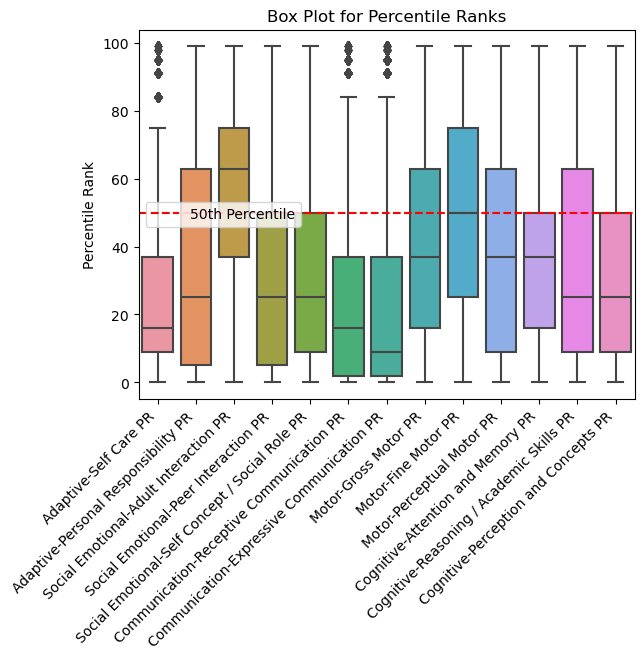

In [7]:
sns.boxplot(data=teis_subdomains)

# horizontal line at the 50th percentile mark
plt.axhline(y=50, color='r', linestyle='--', label='50th Percentile')
plt.title('Box Plot for Percentile Ranks')
plt.ylabel('Percentile Rank')
plt.xticks(rotation=45, ha='right')  
plt.legend()


In [9]:
teis.head(2)

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

columns_to_convert = [col for col in teis.columns if 'Scaled Scores' in col or 'SS' in col]
columns_to_convert

In [25]:
                'Motor-Fine Motor SS', 'Motor-Perceptual Motor SS', 'Cognitive-Attention and Memory SS', 'Cognitive-Reasoning / Academic Skills SS', 'Cognitive-Perception and Concepts SS']]

teis_domains  teis_subdomains  use both these dataframes. find min, max, mean for each perceintile rank. thenfidn out standard deviation for each column. from here look at standard devations accros the entire data frame  to detmrien patters in standard deviaton. 